# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

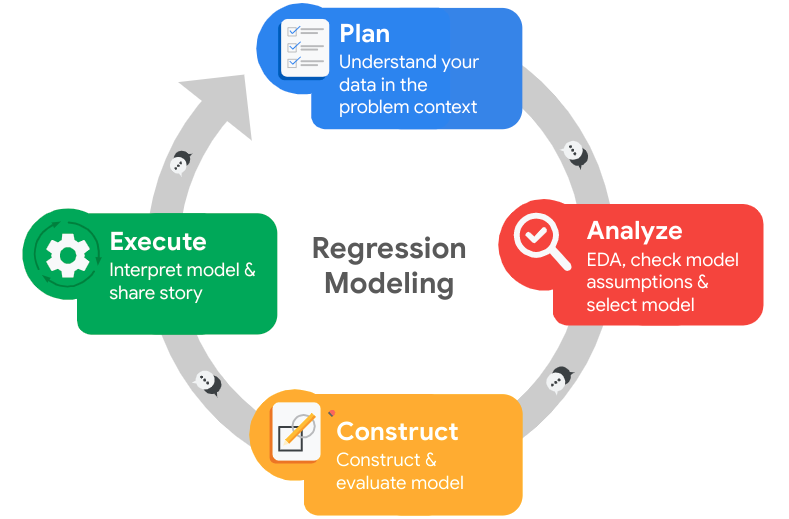



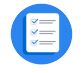

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
The leadership at Salifort Motors
- What are you trying to solve or accomplish?
Trying to determine if there is any correlation between employees jobs and their departure. In terms I am trying to determine why someone leaves the company and if there is a way to predict their departure.
- What are your initial observations when you explore the data?
We are provided with valuable metrics that will be good features to include in whichever model is used. At this point, based on this information, I am leaning towards a classifier or machine learning model. The target metric is categorical (left or did not leave)
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?
I want to make sure a group is not targeted. I need to consider all information to prevent exclusion of groups.




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation', 'average_montly_hours':'average_monthly_hours',\
                   'Work_accident': 'work_accident', 'Department':'department', 'time_spend_company': 'tenure'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'evaluation', 'number_project', 'average_monthly_hours',
       'tenure', 'work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction             0
evaluation               0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction,evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 396 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction           3008 non-null   float64
 1   evaluation             3008 non-null   float64
 2   number_project         3008 non-null   int64  
 3   average_monthly_hours  3008 non-null   int64  
 4   tenure                 3008 non-null   int64  
 5   work_accident          3008 non-null   int64  
 6   left                   3008 non-null   int64  
 7   promotion_last_5years  3008 non-null   int64  
 8   department             3008 non-null   object 
 9   salary                 3008 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 258.5+ KB


It is noted there are 3008 rows in the dataset that are duplicates. As the goal of the project is to determine an employees likelyhood to leave, duplicates could skew the data or cause undue influence on a developed model. For these reasons, we will be removing the duplicate data to allow the model to only run on unique lines.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_subset = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df_subset.head())
print(df_subset.info())

   satisfaction  evaluation  number_project  average_monthly_hours  tenure  \
0          0.38        0.53               2                    157       3   
1          0.80        0.86               5                    262       6   
2          0.11        0.88               7                    272       4   
3          0.72        0.87               5                    223       5   
4          0.37        0.52               2                    159       3   

   work_accident  left  promotion_last_5years department  salary  
0              0     1                      0      sales     low  
1              0     1                      0      sales  medium  
2              0     1                      0      sales  medium  
3              0     1                      0      sales     low  
4              0     1                      0      sales     low  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column         

### Check outliers

Check for outliers in the data.

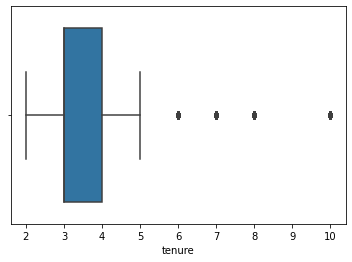

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df_subset['tenure'])


In [12]:
quartile_25 = df_subset['tenure'].quantile(0.25)
quartile_75 = df_subset['tenure'].quantile(0.75)

iqr = quartile_75 - quartile_25

upper_limit = quartile_75 + 1.5 * iqr
lower_limit = quartile_25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df_subset[(df_subset['tenure'] > upper_limit) | (df_subset['tenure'] < lower_limit)]
print(len(outliers))

Lower limit: 1.5
Upper limit: 5.5
824


From the above we can see that the majority of employees have a tenure between 1.5 and 5.5 years. There are 824 employees that are either below 1.5 years or above 5.5 years

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

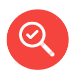
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

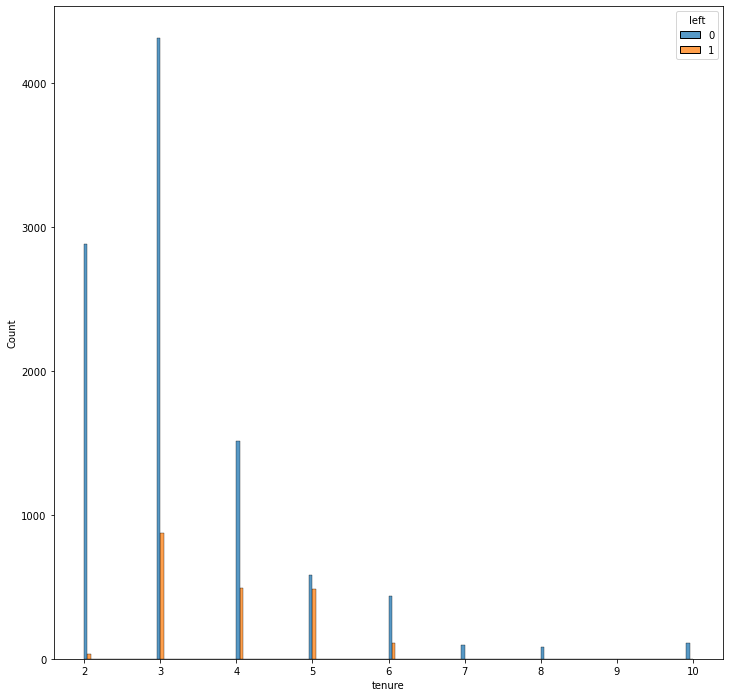

In [13]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,12))
sns.histplot(data=df_subset,x='tenure',hue='left', multiple='dodge')
plt.show()

The above shows that for those with several years at the company those that depart decrease as they are with the company longer. As we can see there is an increased number of departures at the 3 year mark. It may be worth focusing on those that have been with the company for 3 years to determine why they are departing.

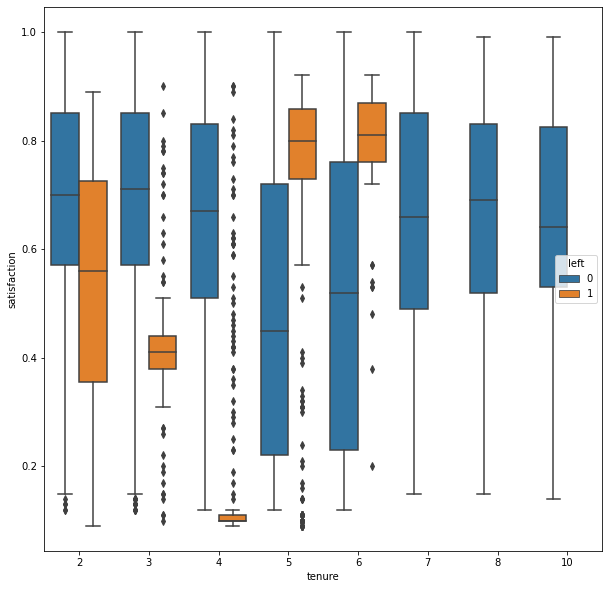

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
sns.boxplot(data=df_subset,y='satisfaction',x='tenure',hue='left')

From the above, we can see that satisfaction for years 3 and 4 are typically lower with 4 being well below others. Years 5 and 6 have an interesting trend of those leaving having higher satisfaction than those that leave. This could mean several things possibly the employees choosing to find a new job that pays more or offers better benefits. While satisfaction is a key metric typically considered for why employees leave, this data shows there are likely other causes for those that have been with the company for 5 or 6 years.

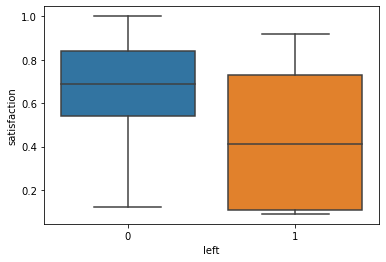

In [15]:
sns.boxplot(data=df_subset,y='satisfaction', x='left')

There is a large range of satisfaction for those that left. Those that have remained have, on average, higher satisfaction ratings.

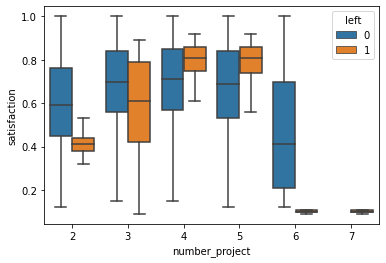

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df_subset,x='number_project',y='satisfaction', hue='left', showfliers=False)

This graph shows that those whith a high number of projects have very low satisfaction. Lower number of projeccts also appears to lead to low satisfactoin in those that choose to leave. 

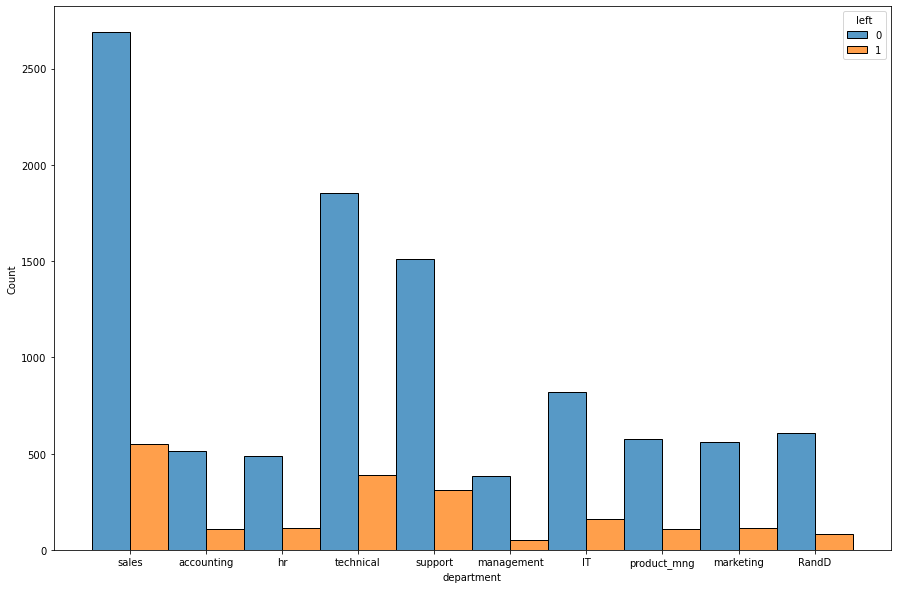

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
sns.histplot(data=df_subset,x='department',hue='left',multiple='dodge')

The above appears to show that there is no outlier in which department has indivudals leaving. Sales has the most departing; however, the team is also the largest. 
Management has the lower number of those leaving. It can be hypothesised that these individuals have been with the company for some time and have been promoted; however, further research will need to be conducted to confirm this.

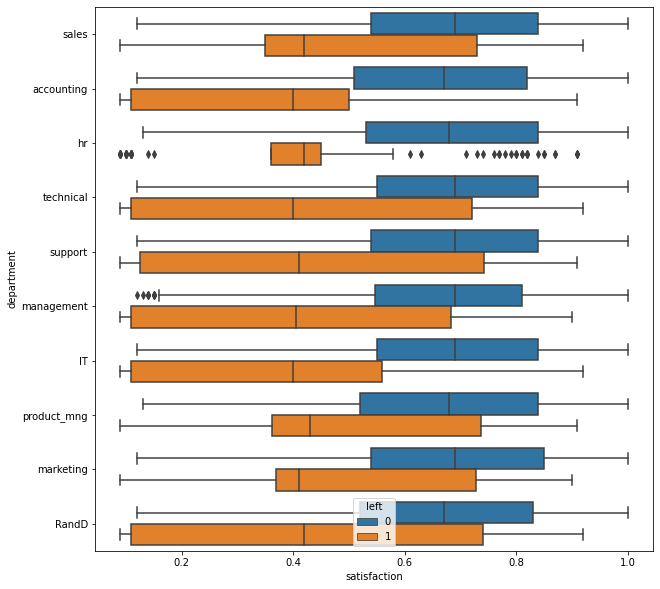

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
sns.boxplot(data=df_subset, x='satisfaction', y='department', hue='left')

-For many of the departments, the satisfaction of those that have not left is between 0.5 and 0.85, while those that left have a very wide range. 

-The sales, marketing, and product management departments have the most overlap of satisfaction between those that have stayed and have left.

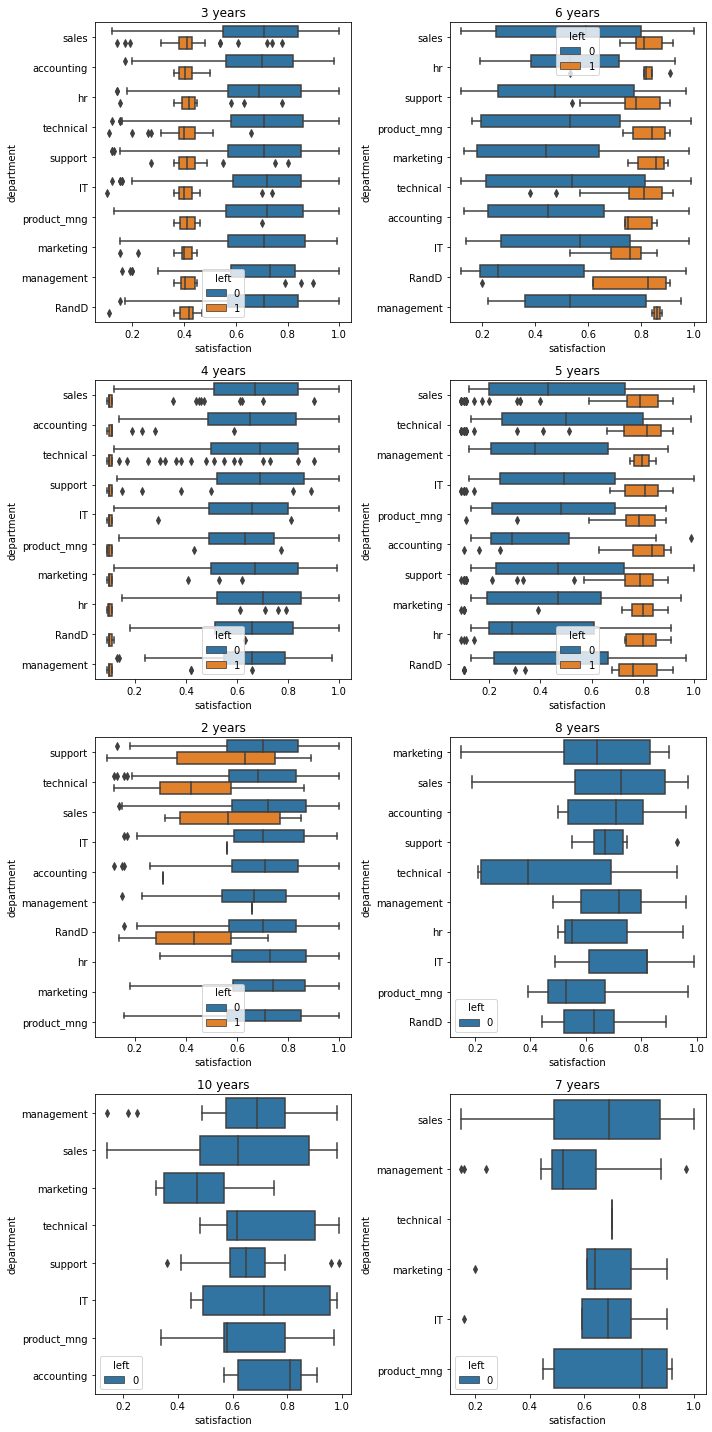

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(4, 2, figsize=(10,20))
a = 0
for i in df_subset['tenure'].unique():
    sns.boxplot(data=df_subset[df_subset['tenure'] == i], x='satisfaction', y='department', hue='left', ax = ax[a//2][a%2])
    ax[a//2][a%2].set_title(f'{i} years')
    a += 1
plt.tight_layout()

We can see from the above that for those that left, year 3 and 4 had the lowest satisfaction rating. If we also look at satisfaction ratings for those still with the company year 5 and 6 have the higher values for those that left and lower values for those that remian. It seems the company should really focus on this group of individuals (those between 3 and 6 years at the company) to determine why they (a) disatisfied between years 3 and 4 and (b) why those that are very satisfied between years 5 and 6 are leaving.

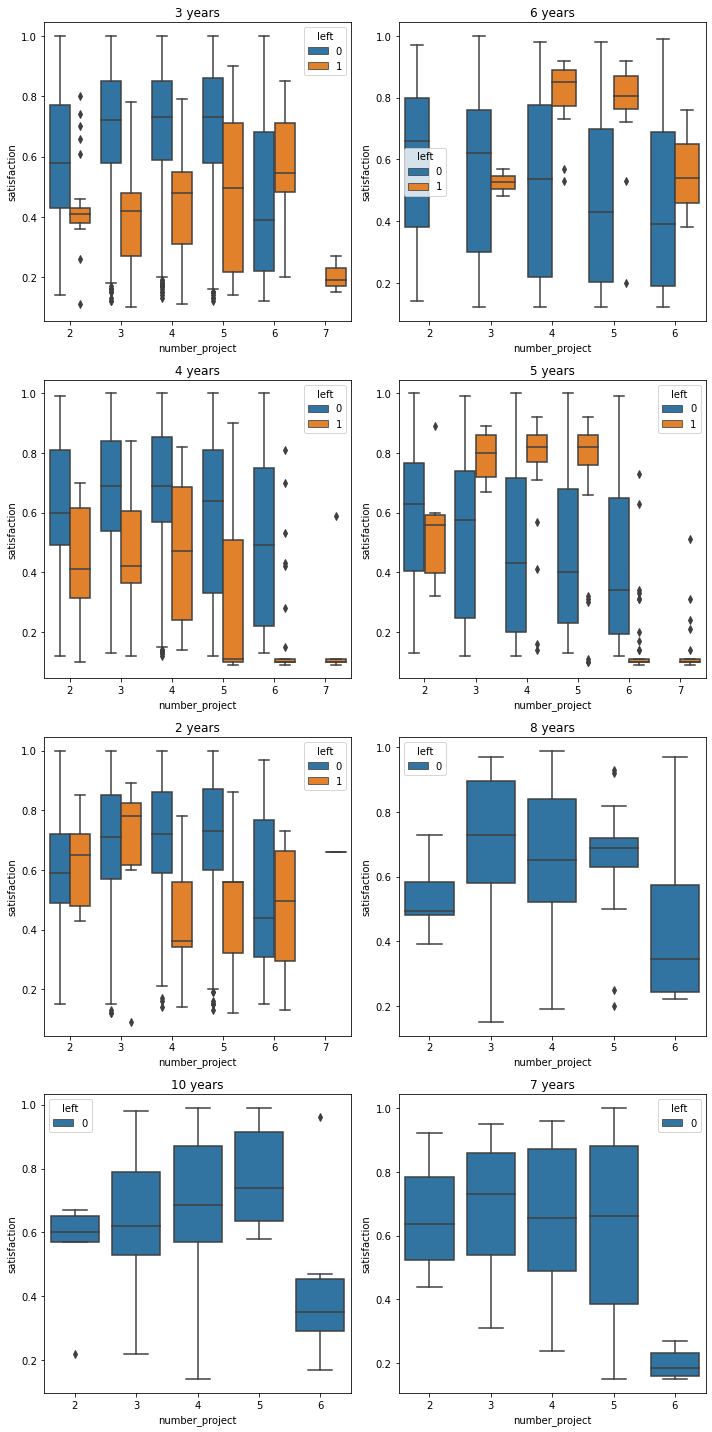

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(4, 2, figsize=(10,20))
a = 0
for i in df_subset['tenure'].unique():
    sns.boxplot(data=df_subset[df_subset['tenure'] == i], y='satisfaction', x='number_project', hue='left', ax = ax[a//2][a%2])
    ax[a//2][a%2].set_title(f'{i} years')
    a += 1
plt.tight_layout()

Here again we see that year 3 and 4 have rather low satisfaction ratings for those that left despite what the number of projects are. We do see a lare reduction in satisfactions when the job count converts to 6 or 7 jobs. In year 4 and 5 all those with 7 projects departed with low satisfaction ratings. It should also be noted that anyone that has achieved 6 years tenure have only 6 projects at most. With those at 6 projects reporting the lowest satisfaction rating for the respective year. This would indicate a correlation between satisfaction and project count.

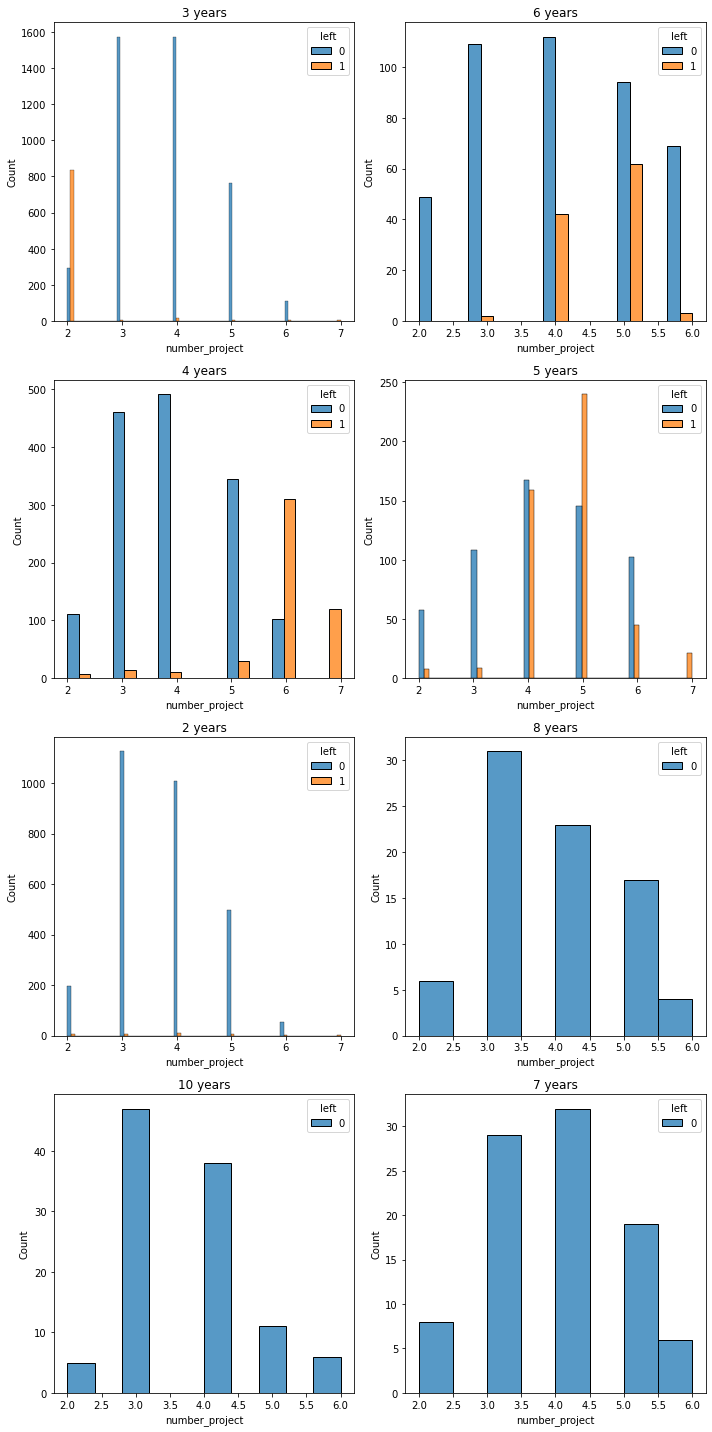

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
a = 0
for i in df_subset['tenure'].unique():
    sns.histplot(data=df_subset[df_subset['tenure'] == i], x='number_project', hue='left', multiple = 'dodge', ax = ax[a//2][a%2])
    ax[a//2][a%2].set_title(f'{i} years')
    a += 1
plt.tight_layout()

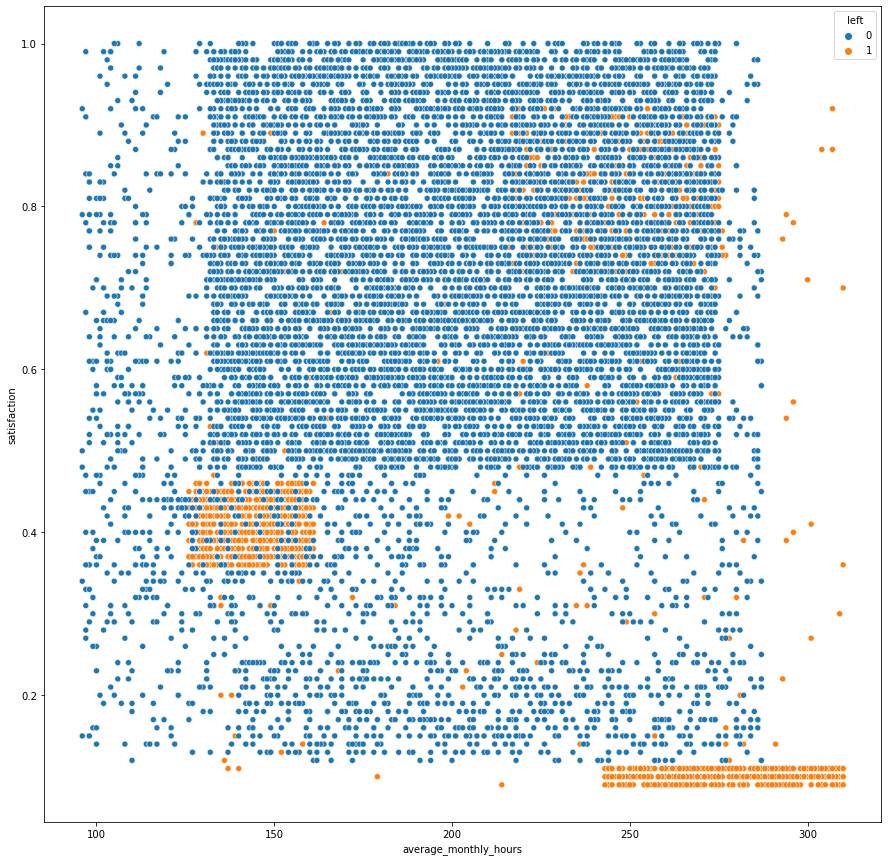

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_subset, x='average_monthly_hours', y='satisfaction', hue='left')
    

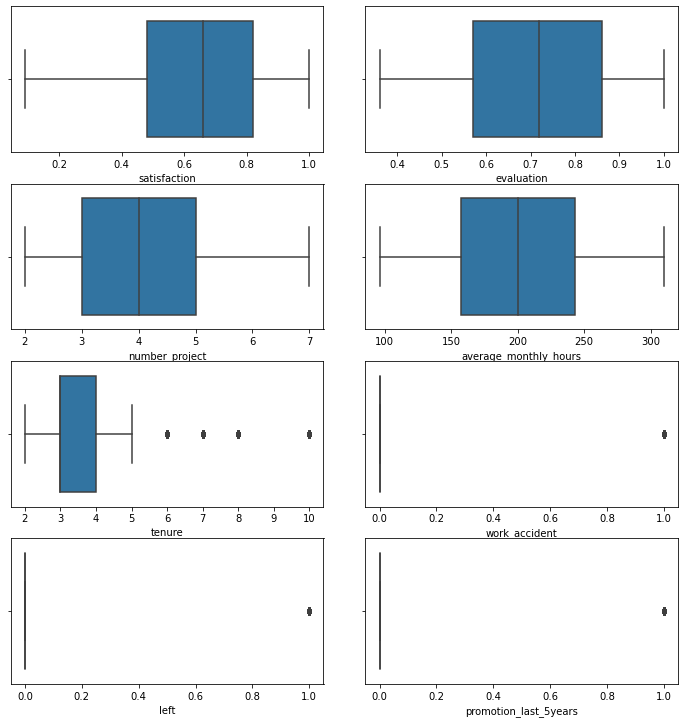

In [23]:
fig, ax = plt.subplots(4, 2, figsize= (10,10))
columns = ['satisfaction', 'evaluation', 'number_project', 'average_monthly_hours',
       'tenure', 'work_accident', 'left', 'promotion_last_5years']
fig.tight_layout()
a = 0
for col in columns:
    sns.boxplot(data=df_subset, x=pd.to_numeric(df_subset[col]), ax = ax[a//2][a%2])
    a += 1
fig.show()

While there are outliers presented in the tenure columns, it is believed these are true outliers and would be valuable information for a model to use as a feature. For this reason, we will not be removing the outliers from the data. Work accident, left, and promotion_last_5years are binary variables.

### Insights

There are many key insights found throughout this exploration some are as follows:

- Project count is very important to satisfaction and retention. This was seen as those with 7 projects reported very low satisfaction scores and almost all of those with 7 projects have left the company. Those with 6 projects also appear to give very low satisfaction ratings; however, there are many from 6 projects that remain with the company.

- Tenure is a key metric for satisfaction. While there is likely no causation in this metric, there does appear to be a strong correlation between the number of years an employee has been with the company and their satisfaction ratings. Many that left the company during years 3 and 4 report very low satisfaction scores, while those that left during years 5 and 6 reported very high satisfaction ratings. 

- It can also be noted that many departed the company between years 3 and 6. While satisfaction is indicated to be a key metric for years 3 and 4, as previously indicated years 5 and 6 had high numbers leave the company though they gave high satisfaction ratings. 

In [24]:
df_corr = df_subset.corr()

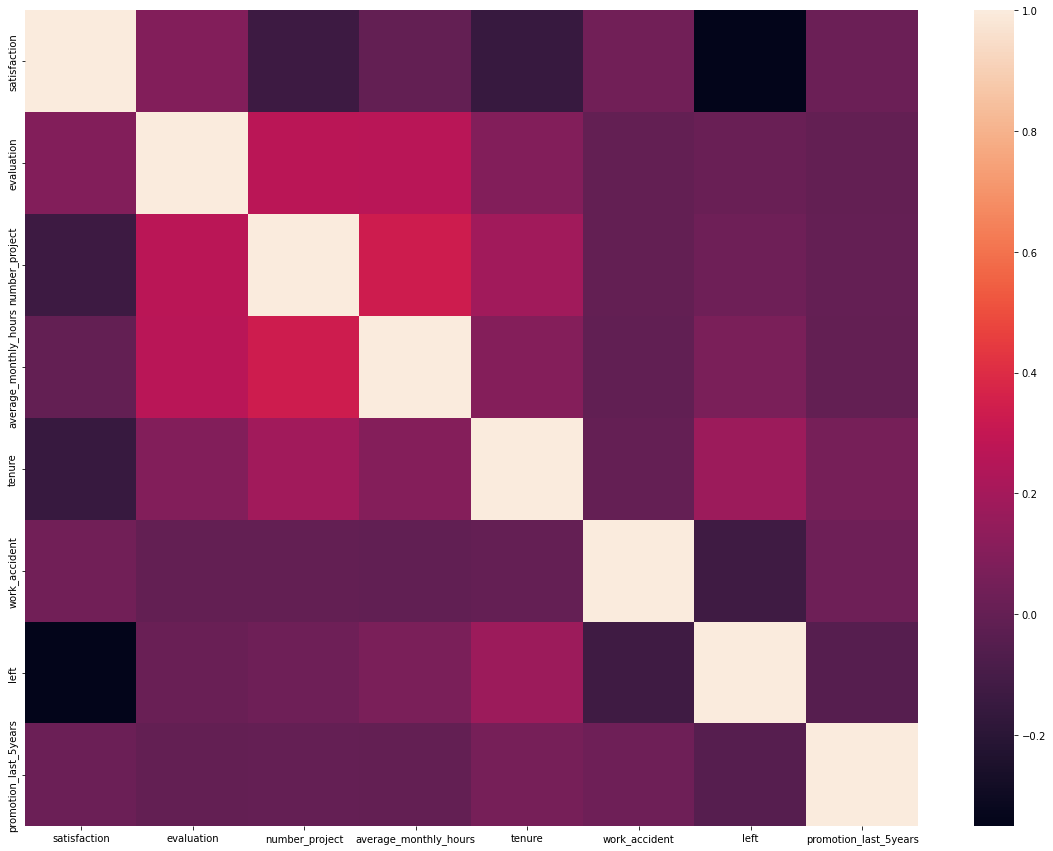

In [25]:
# looking for multicollinearity
plt.figure(figsize = (20,15))
sns.heatmap(df_corr, label=True)

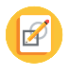
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Do you notice anything odd?
There are no individuals with a tenure of 9 years included in the data. It may be worth asking if this data is available or why it is missing.
2. Which independent variables did you choose for the model and why?
I am going to innclude all independent variables in the models allowing the model to run and select the best fit features.
3. Are each of the assumptions met?
4. How well does your model fit the data?
5. Can you improve it? Is there anything you would change about the model?
6. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
7. Do you have any ethical considerations in this stage?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###
# define the target variable and feature set
y = df_subset[['left']]

X = df_subset.drop('left', axis = 1)
X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [27]:
# define random forest and gridsearch hyperparameters

cv_params = {
    'n_estimators' : [50,100], 
    'max_depth' : [10,50],        
    'min_samples_leaf' : [0.5,1], 
    'min_samples_split' : [0.001, 0.01],
    'max_features' : ["sqrt"], 
    'max_samples' : [.5,.9]
}

# create splits for the gridsearch 

scorin = {'accuracy', 'precision', 'recall', 'f1'}

In [28]:
# initiate randomforest and search through selected params
rf = RandomForestClassifier(random_state=0)

rf_val = GridSearchCV(rf, cv_params, scoring=scorin, cv = 4, refit = 'f1')

In [29]:
# fit the random forest model

rf_md = rf_val.fit(X_train, y_train)

In [30]:
rf_md.best_score_

0.9439404637416275

In [31]:
rf_md.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [32]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [33]:
rf_results = make_results('RF GS', rf_md, 'f1')
rf_results

,model,precision,recall,f1,accuracy
0,RF GS,0.987162,0.904531,0.94394,0.981875


In [34]:
rf_pred = rf_md.predict(X_test)

In [35]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    f1 = f1_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    
    rf_test_scores = pd.DataFrame()
    rf_test_scores = rf_test_scores.append({'model': model_name,
                       'precision': precision,
                       'accuracy': accuracy,
                       'recall': recall,
                       'f1': f1
                      }, ignore_index = True)
    return rf_test_scores

In [36]:
test_score = get_test_scores('test', rf_pred, y_test)
test_score

,model,precision,accuracy,recall,f1
0,test,0.979866,0.985657,0.927966,0.95321


In [37]:
results = pd.concat([rf_results, test_score], axis = 0)
results

,model,precision,recall,f1,accuracy
0,RF GS,0.987162,0.904531,0.94394,0.981875
0,test,0.979866,0.927966,0.95321,0.985657


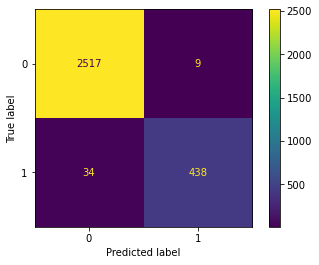

In [38]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

conf_matrix_plot(rf_md, X_test, y_test)

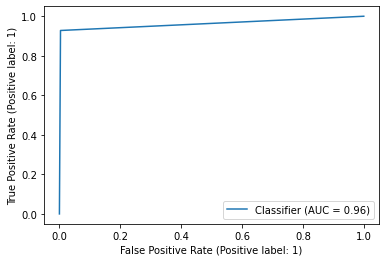

In [40]:
RocCurveDisplay.from_predictions(y_test, rf_pred)

plt.show()

The random forest was very successful in predicting whether an individual would leave. The precision and accuracy as well as the f1 and recall are very high. When runing the test data there was a dip in the precision, but an increase in the f1 and recall. The confusion matrix also shows the model is very successful in generating correct answers. I am still going to run a boosted model to also determine if there is a better option 

In [41]:
xgb = XGBClassifier(objective='binary:logistic')

# dictionary of hyperparameters to tune

xgb_param = {
    'max_depth': [5, 6, 7], 
    'min_child_weight': [2,3,4],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 150]
}
# scoring metrics to capture

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# GridSearchCV object

xgb_cv = GridSearchCV(xgb, xgb_param, scoring=scoring, cv=5, refit='f1')

In [42]:
%%time
# fitting the xgboost
xgb_fr = xgb_cv.fit(X_train, y_train)

CPU times: user 6min 24s, sys: 2.27 s, total: 6min 26s
Wall time: 3min 14s


In [43]:
xgb_fr.best_score_

0.9467579214202401

In [44]:
xgb_fr.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100}

In [45]:
xgb_results = make_results('xgb', xgb_fr, 'f1')
xgb_results

,model,precision,recall,f1,accuracy
0,xgb,0.980919,0.91509,0.946758,0.982654


In [46]:
xgb_pred = xgb_fr.predict(X_test)

In [47]:
xgb_test = get_test_scores('xgb test', xgb_pred, y_test)
xgb_results = pd.concat([xgb_results, xgb_test], axis = 0)
xgb_results

,model,precision,recall,f1,accuracy
0,xgb,0.980919,0.915090,0.946758,0.982654
0,xgb test,0.979955,0.932203,0.955483,0.986324


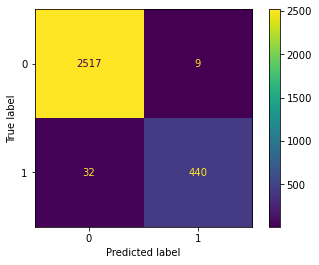

In [48]:
conf_matrix_plot(xgb_fr, X_test, y_test)

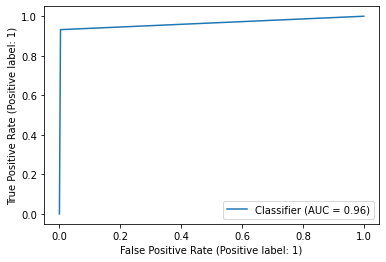

In [49]:
RocCurveDisplay.from_predictions(y_test, xgb_pred)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 2160x2160 with 0 Axes>

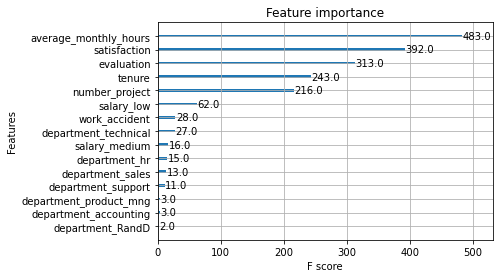

In [50]:
plt.figure(figsize=(30,30))
plot_importance(xgb_fr.best_estimator_, max_num_features=20);
plt.show

The XGBoost model performed slightly better than the random forest model. 

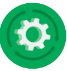
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]